### <b> Multinomial Logistic Regression Model using Age, Race, Sex, and Offense Types as Features <b>

Load Necessary Libraries

In [235]:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Read Dataset

In [236]:
data = pd.read_csv(
    r'C:\Users\janie\OneDrive\Desktop\3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_CLEAN.csv')
data

,Fiscal_Year_Released,Recidivism_Reporting_Year,Age_At_Release,Days_To_Return,Release_Type,Race_Ethnicity,Sex,Offense_Classification,Offense_Type,Offense_Subtype,Return_To_Prison,Recidivism_Type,New_Offense_Classification,New_Offense_Type,New_Offense_Subtype
0,2010,2013,2.0,433,4,7,2,5,5,18,2,1,5,1,25
1,2010,2013,2.0,453,2,10,2,6,3,23,2,3,0,0,0
2,2010,2013,3.0,832,4,10,2,4,1,25,2,3,0,0,0
3,2010,2013,2.0,0,4,10,2,4,2,12,1,2,0,0,0
4,2010,2013,3.0,116,2,7,2,6,5,1,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,1.0,0,6,9,2,5,5,1,1,2,0,0,0
26016,2015,2018,3.0,0,11,10,2,5,5,19,1,2,0,0,0
26017,2015,2018,2.0,0,5,10,1,3,4,24,1,2,0,0,0
26018,2015,2018,2.0,0,10,10,2,6,3,23,1,2,0,0,0


In [237]:
data = data.astype(float)

In [238]:
data.drop(['Fiscal_Year_Released', 'Recidivism_Reporting_Year'], axis=1, inplace=True)

In [239]:
data_age = data['Age_At_Release'].value_counts()
print(data_age)

2.0    9554
3.0    6223
1.0    4590
4.0    4347
5.0    1303
Name: Age_At_Release, dtype: int64


In [240]:
data_race = data['Race_Ethnicity'].value_counts()
print(data_race)

10.0    17584
7.0      6109
9.0      1522
2.0       502
4.0       192
6.0        37
0.0        35
1.0        20
8.0        12
3.0         5
5.0         2
Name: Race_Ethnicity, dtype: int64


In [241]:
data_sex = data['Sex'].value_counts()
print(data_sex)

2.0    22678
1.0     3339
0.0        3
Name: Sex, dtype: int64


Remove Null

<AxesSubplot:>

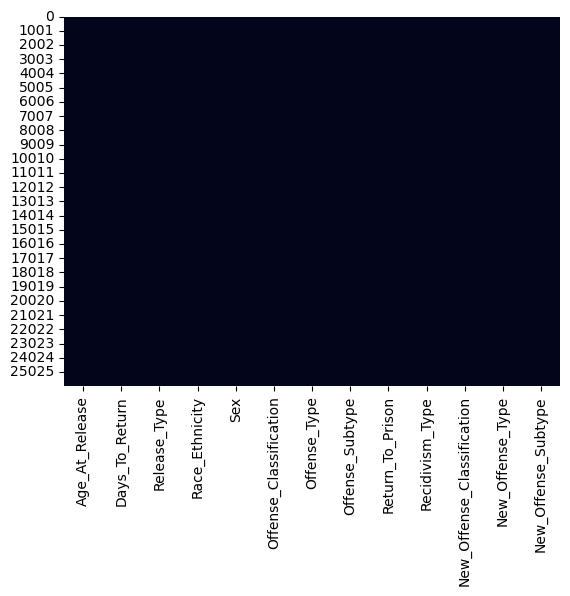

In [242]:
sns.heatmap(data.isnull(), cbar=False)

In [243]:
data['Age_At_Release'] = data['Age_At_Release'].fillna('0')

In [244]:
data.isnull().sum()

Age_At_Release                0
Days_To_Return                0
Release_Type                  0
Race_Ethnicity                0
Sex                           0
Offense_Classification        0
Offense_Type                  0
Offense_Subtype               0
Return_To_Prison              0
Recidivism_Type               0
New_Offense_Classification    0
New_Offense_Type              0
New_Offense_Subtype           0
dtype: int64

Create Training and Test Datasets

In [245]:
x = data[['Age_At_Release', 'Race_Ethnicity', 'Sex', 'Offense_Classification',
          'Offense_Type', 'Offense_Subtype', 'New_Offense_Classification', 'New_Offense_Type', 'New_Offense_Subtype']].astype(float)
y = data[['Return_To_Prison']].astype(float)

In [246]:
print(list(x.columns.values))

['Age_At_Release', 'Race_Ethnicity', 'Sex', 'Offense_Classification', 'Offense_Type', 'Offense_Subtype', 'New_Offense_Classification', 'New_Offense_Type', 'New_Offense_Subtype']


In [247]:
print(list(y.columns.values))

['Return_To_Prison']


In [248]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=5)

In [249]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20816, 9)
(5204, 9)
(20816, 1)
(5204, 1)


In [250]:
y_train = y_train.values.ravel()

Predict Classification

In [251]:
model1 = LogisticRegression(random_state=5, multi_class='multinomial',
                            penalty='none', solver='newton-cg').fit(x_train, y_train)

In [252]:
pred = model1.predict(x_test)

In [253]:
param = model1.get_params()
print(param)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 5, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Print Model Parameters

In [254]:
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-1.14983405]
Coefficients: 
 [[-0.09947059  0.01496056  0.06054868  0.0222689  -0.05272345  0.00589469
   1.04138182  1.27053899  0.84646587]]


Calculate Odds Ratio Estimates

In [255]:
np.exp(model1.coef_)

array([[0.90531657, 1.01507303, 1.06241931, 1.0225187 , 0.94864232,
        1.0059121 , 2.8331292 , 3.56277235, 2.33139283]])

Statsmodels to Assess Variables

In [256]:
np.asarray(data)

array([[2.0, 433.0, 4.0, ..., 5.0, 1.0, 25.0],
       [2.0, 453.0, 2.0, ..., 0.0, 0.0, 0.0],
       [3.0, 832.0, 4.0, ..., 0.0, 0.0, 0.0],
       ...,
       [2.0, 0.0, 5.0, ..., 0.0, 0.0, 0.0],
       [2.0, 0.0, 10.0, ..., 0.0, 0.0, 0.0],
       [3.0, 369.0, 8.0, ..., 6.0, 5.0, 11.0]], dtype=object)

In [257]:
logit_model = sm.MNLogit(y_train, sm.add_constant(x_train))

In [258]:
result = logit_model.fit()
stats1 = result.summary()
stats2 = result.summary2()
print(stats1)
print(stats2)

         Current function value: 0.240638
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                20816
Model:                        MNLogit   Df Residuals:                    20806
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                  0.6222
Time:                        16:02:05   Log-Likelihood:                -5009.1
converged:                      False   LL-Null:                       -13258.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       y=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.2997      0.258     -8.925      0.000      -2.805      -1.795
Age_At_Release   

c:\Users\janie\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy

In [259]:
print('Accuracy Score:', metrics.accuracy_score(y_test, pred))

Accuracy Score: 0.925249807840123


In [260]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95      3473
         2.0       1.00      0.78      0.87      1731

    accuracy                           0.93      5204
   macro avg       0.95      0.89      0.91      5204
weighted avg       0.93      0.93      0.92      5204

